## 문제상황 인식
- 월별로 시트가 구분되어 있는 매출 데이터를 요약하여 정리
  - step1 : 데이터 병합
  - step2 : 포맷 통일 및 변수 추가
  - step3 : 월별 매출 추이 파악
  - step4 : 조건에 따른 판매 통계 분석
  - step5 : 충성 고객 파악
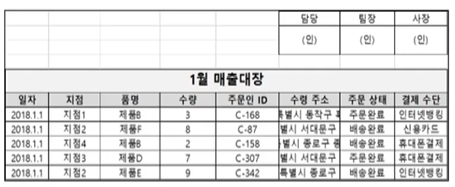

## step1 : 데이터 병합
 - 하나의 데이터가 12개의 시트로 구분되어 있어, 효과적인 분석을 위해 통합해야 함
 - 또한, 분석에 불필요한 부분이 있어 이를 제거해야 함

In [1]:
import os
import pandas as pd
os.chdir(r'C:\Users\신상훈\Desktop\preprocessing\part-1.-데이터-핸들링\1. 데이터 핸들링\데이터')

In [11]:
# list comprehension
sheet_name = [str(i+1) + '월' for i in range(12)]
sheet_name

['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']

In [10]:
# concat을 이용한 데이터 병합
merged_df = pd.DataFrame()
for sn in sheet_name:
    df = pd.read_excel('월별매출데이터.xlsx', sheet_name = sn, skiprows = range(6)).iloc[:,1:]
    merged_df = pd.concat([merged_df,df], axis = 0, ignore_index = True)

In [9]:
merged_df.head()

,일자,지점,품명,수량,주문인 ID,수령 주소,주문 상태,결제 수단
0,2018.1.1,지점1,제품B,3,C-168,서울특별시 동작구 흑석동,주문완료,인터넷뱅킹
1,2018.1.1,지점2,제품F,8,C-87,서울특별시 서대문구 신촌동,배송완료,신용카드
2,2018.1.1,지점4,제품B,2,C-158,서울특별시 종로구 종로5가,배송완료,휴대폰결제
3,2018.1.1,지점3,제품D,7,C-307,서울특별시 서대문구 냉천동,주문완료,휴대폰결제
4,2018.1.1,지점2,제품E,9,C-342,서울특별시 종로구 묘동,배송완료,인터넷뱅킹


## step2 : 포맷 통일 및 변수 추가

In [12]:
# str.replace를 사용하여 '.'을 '-'로 변경
# 문자열 검색
merged_df['일자'] = merged_df['일자'].str.replace('.','-')
merged_df['일자']

0          2018-1-1
1          2018-1-1
2          2018-1-1
3          2018-1-1
4          2018-1-1
            ...    
18224    2018-12-31
18225    2018-12-31
18226    2018-12-31
18227    2018-12-31
18228    2018-12-31
Name: 일자, Length: 18229, dtype: object

- Series.to_dict(): Series의 index를 key로, data를 value로 하는 사전으로 변환
- Series.replace(dict): Series에 있는 값 가운데 dict의 key의 값의 값이 있으면 대응되는 value로 변환

In [13]:
price_df = pd.read_excel("제품별_가격정보.xlsx")
price_df # 원활한 분석을 위해, 행과 열을 바꿀 필요가 있음

,제품,제품A,제품B,제품C,제품D,제품E,제품F
0,가격,20000,5000,10000,8000,30000,15000


In [16]:
price_df = price_df.T
price_df # index: 제품, 0: 가격

,0
제품,가격
제품A,20000
제품B,5000
제품C,10000
제품D,8000
제품E,30000
제품F,15000


In [17]:
price_df.loc['제품A':'제품F', 0] # 새로운 데이터프레임의 컬럼명이 0임

제품A    20000
제품B     5000
제품C    10000
제품D     8000
제품E    30000
제품F    15000
Name: 0, dtype: object

In [18]:
price_dict = price_df.loc['제품A':'제품F', 0].to_dict() # to_dict(): series를 dictionary로 변환 (index -> key, data -> value)
price_dict

{'제품A': 20000,
 '제품B': 5000,
 '제품C': 10000,
 '제품D': 8000,
 '제품E': 30000,
 '제품F': 15000}

In [19]:
merged_df['품명'].head()

0    제품B
1    제품F
2    제품B
3    제품D
4    제품E
Name: 품명, dtype: object

In [20]:
# replace: 품명 컬럼에 price dict의 key가 있으면 value로 바꿈
# 새로운 변수 정의
merged_df['가격'] = merged_df['품명'].replace(price_dict)

In [21]:
# 주문 금액 변수 추가
merged_df['주문 금액'] = merged_df['수량'] * merged_df['가격'] * 1.1 

# ndarray 브로드캐스팅 + 유니버설 함수

In [22]:
merged_df.head()

,일자,지점,품명,수량,주문인 ID,수령 주소,주문 상태,결제 수단,가격,주문 금액
0,2018-1-1,지점1,제품B,3,C-168,서울특별시 동작구 흑석동,주문완료,인터넷뱅킹,5000,16500.0
1,2018-1-1,지점2,제품F,8,C-87,서울특별시 서대문구 신촌동,배송완료,신용카드,15000,132000.0
2,2018-1-1,지점4,제품B,2,C-158,서울특별시 종로구 종로5가,배송완료,휴대폰결제,5000,11000.0
3,2018-1-1,지점3,제품D,7,C-307,서울특별시 서대문구 냉천동,주문완료,휴대폰결제,8000,61600.0
4,2018-1-1,지점2,제품E,9,C-342,서울특별시 종로구 묘동,배송완료,인터넷뱅킹,30000,297000.0


## Step 3 : 월별 매출 추이 파악

In [23]:
# 일자 변수에서 월만 추출 (일자 변수가 object type이므로 split을 하더라도 object여서 astype으로 int로 변경함)
merged_df['월'] = merged_df['일자'].str.split('-', expand = True).iloc[:, 1].astype(int)
merged_df['월']

0         1
1         1
2         1
3         1
4         1
         ..
18224    12
18225    12
18226    12
18227    12
18228    12
Name: 월, Length: 18229, dtype: int32

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (8, 10)

In [25]:
# 월과 품목에 따른 주문 금액 합계 계산
grouped_df_by_month = merged_df.groupby(['월'], as_index = False)['주문 금액'].sum()
grouped_df_by_month_and_product = merged_df.groupby(['월', '품명'], as_index = False)['주문 금액'].sum()

In [26]:
grouped_df_by_month.head()

,월,주문 금액
0,1,114211900.0
1,2,104314100.0
2,3,111015300.0
3,4,122255100.0
4,5,110561000.0


In [27]:
grouped_df_by_month_and_product.head()

,월,품명,주문 금액
0,1,제품A,7392000.0
1,1,제품B,8283000.0
2,1,제품C,18722000.0
3,1,제품D,23170400.0
4,1,제품E,32010000.0


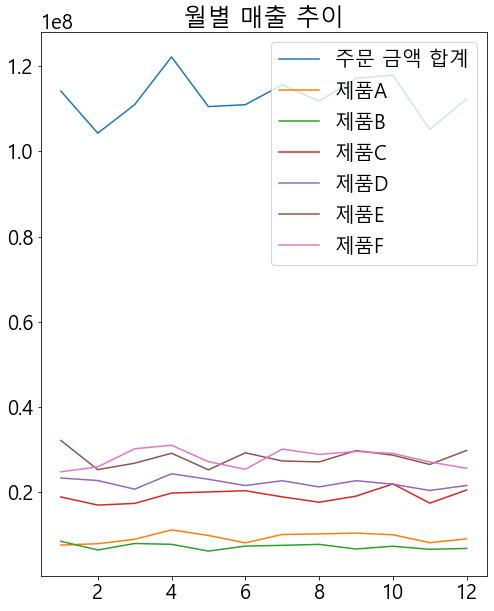

In [29]:
plt.title('월별 매출 추이')
plt.plot(grouped_df_by_month['월'],grouped_df_by_month['주문 금액'],
         label = "주문 금액 합계")
for product in grouped_df_by_month_and_product['품명'].unique():
    plt.plot(grouped_df_by_month_and_product['월'].unique(), # 월의 개수가 12 * 품목 개수라는 것에 주의
             grouped_df_by_month_and_product.loc[grouped_df_by_month_and_product['품명'] == product]['주문 금액'], # 마스킹 검색            
             label = product)

plt.legend(loc = 'upper right')

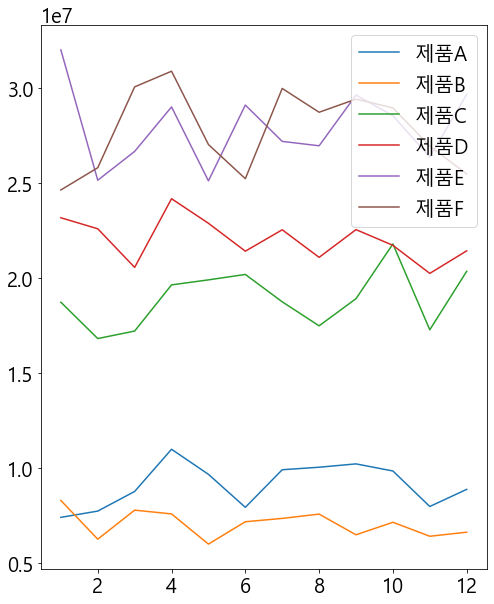

In [30]:
for product in grouped_df_by_month_and_product['품명'].unique():
    plt.plot(grouped_df_by_month_and_product['월'].unique(), # 월의 개수가 12 * 품목 개수라는 것에 주의
             grouped_df_by_month_and_product.loc[grouped_df_by_month_and_product['품명'] == product]['주문 금액'], # 마스킹 검색            
             label = product)

plt.legend(loc = 'upper right')

#### Step 4. 다양한 조건에 따른 판매 통계 분석

<BarContainer object of 6 artists>

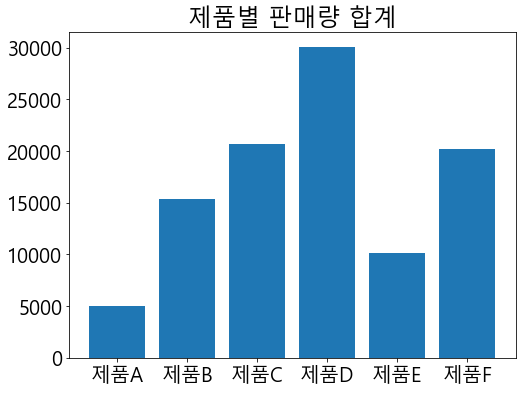

In [31]:
plt.rcParams["figure.figsize"] = (8, 6)

# 제품별 판매량 통계
grouped_df_by_product = merged_df.groupby('품명', as_index = False)['수량'].sum()
plt.title("제품별 판매량 합계")
plt.bar(grouped_df_by_product['품명'], grouped_df_by_product['수량'])

In [32]:
# 제품과 결제 수단에 따른 판매량 분석
pivot_df = pd.pivot_table(merged_df, index = '품명', columns = '결제 수단', values = '주문 금액')
pivot_df

결제 수단,무통장입금,신용카드,인터넷뱅킹,휴대폰결제
품명,,,,
제품A,119044.444444,130730.769231,118383.783784,130149.532710
제품B,31396.678967,30974.603175,31184.294872,30356.589147
제품C,58494.791667,59329.613095,60252.252252,62119.289340
제품D,49949.734513,48474.183351,48494.623656,49720.000000
제품E,188229.050279,184311.897106,186773.607748,200012.195122
제품F,93805.555556,90812.500000,92334.296724,91058.823529


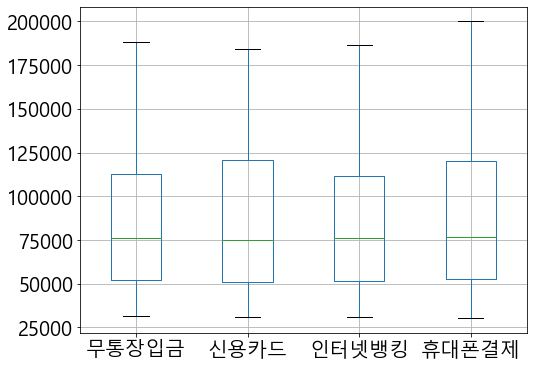

In [39]:
pivot_df.boxplot()

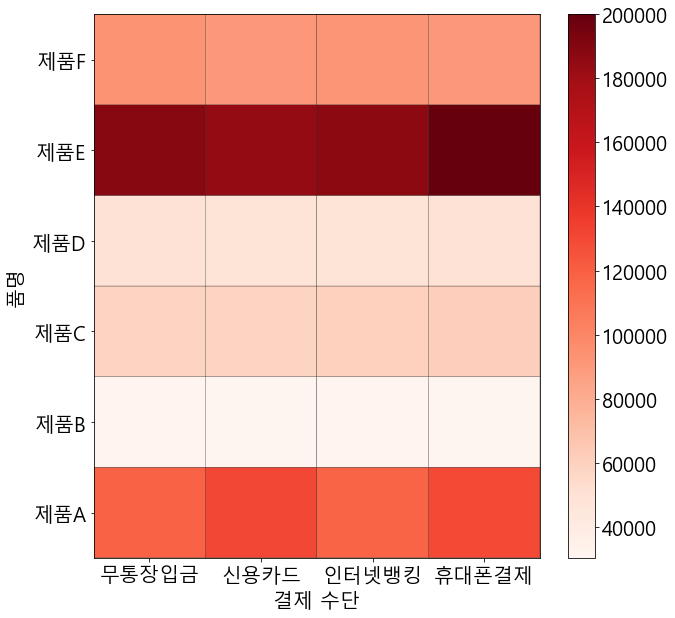

In [40]:
plt.rcParams["figure.figsize"] = (10, 10)

import numpy as np
plt.xlabel('결제 수단')
plt.ylabel('품명')

plt.xticks(np.arange(0.5, len(pivot_df.columns) + 1), pivot_df.columns)
plt.yticks(np.arange(0.5, len(pivot_df.index) + 1), pivot_df.index)

plt.pcolor(pivot_df, edgecolors = 'black', cmap = plt.cm.Reds)
plt.colorbar()

#### Step 5. 충성 고객 찾기

In [41]:
# 주문 금액 합계 기준 상위 10% 고객 찾기
grouped_df_by_customer = merged_df.groupby('주문인 ID')['주문 금액'].agg(['sum', 'count'])
grouped_df_by_customer.head()

,sum,count
주문인 ID,,
C-0,1822700.0,34
C-1,2779700.0,36
C-10,2774200.0,34
C-100,3950100.0,46
C-101,2922700.0,32


In [42]:
threshold_1 = grouped_df_by_customer['sum'].quantile(0.9) # 구매 금액 합계 기준 상위 10%에 속하기 위한 기준
threshold_2 = grouped_df_by_customer['count'].quantile(0.9) # 구매 빈도 기준 상위 10%에 속하기 위한 기준

print(threshold_1, threshold_2)

3506800.0 44.10000000000002


In [44]:
cond1 = grouped_df_by_customer['sum'] >= threshold_1 # 기준 1을 만족하는지 여부
cond2 = grouped_df_by_customer['count'] >= threshold_2 # 기준 2를 만족하는지 여부

grouped_df_by_customer.loc[cond1 & cond2].sort_values(by = ['sum', 'count'], ascending = False).head(10)

,sum,count
주문인 ID,,
C-450,4759700.0,51
C-288,4640900.0,50
C-320,4313100.0,63
C-106,4276800.0,46
C-189,4250400.0,49
C-389,4171200.0,47
C-475,4012800.0,46
C-439,3972100.0,50
C-100,3950100.0,46


In [46]:
cond1

주문인 ID
C-0      False
C-1      False
C-10     False
C-100     True
C-101    False
         ...  
C-95     False
C-96     False
C-97     False
C-98     False
C-99     False
Name: sum, Length: 500, dtype: bool